# Hands-On

Hands-On ini digunakan pada kegiatan Microcredential Associate Data Scientist 2021

# Pertemuan 7

Pertemuan 7 (tujuh) pada  Microcredential Associate Data Scientist 2021 menyampaikan materi mengenai Menentukan Objek atau Memilih Data atau Seleksi Fitur

### Seleksi Univariat
---
Uji statistik dapat digunakan utk memilih fitur-fitur tsb yang memiliki relasi paling kuat dengan variabel output

**Scikit-learn API** menyediakan kelas **SelectKBest** untuk mengekstrak fitur terbaik dari dataset yang diberikan. Metode SelectKBest memilih fitur sesuai dengan k skor tertinggi. Dengan mengubah parameter 'score_func' kita dapat menerapkan metode untuk data klasifikasi dan regresi. Memilih fitur terbaik adalah proses penting ketika kami menyiapkan kumpulan data besar untuk pelatihan. Ini membantu kami menghilangkan bagian data yang kurang penting dan mengurangi waktu pelatihan.

**chi-kuadrat** ini dapat digunakan untuk memilih n_fitur fitur dengan nilai tertinggi untuk uji statistik chi-kuadrat dari X, yang harus berisi hanya fitur non-negatif seperti boolean atau frekuensi (misalnya, jumlah istilah dalam klasifikasi dokumen), relatif terhadap kelas.

Ingatlah bahwa uji chi-kuadrat mengukur ketergantungan antara variabel stokastik, jadi menggunakan fungsi ini "menyingkirkan" fitur-fitur yang paling mungkin tidak bergantung pada kelas dan oleh karena itu tidak relevan untuk klasifikasi.

# Latihan(1)
import library yg dibutuhkan 

In [1]:
# import pandas
import pandas as pd
# import numpy
import numpy as np
# import Library SelectKBest
from sklearn.feature_selection import SelectKBest
# import Library chi kuadrat/squared
from sklearn.feature_selection import chi2

In [3]:
# load dataset
data = pd.read_csv('Iris.csv')
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


# Latihan(2)
buat dataframe tanpa kolom 'Id' yang ditampung dalam variabel bernama df1, lalu tampilkan

In [5]:
# Menghilangkan kolom Id 
df1 = data.drop("Id", axis=1)
# lalu tampilkan 
df1

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


# Latihan(3)

* Buat variabel independent columns dan target kedalam variabel X dan y

In [13]:
#independent columns --> SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm
X = df1.iloc[:,:-1]
# target columns --> species
y = df1["Species"]

# Latihan(4)

* Aplikasikan library **SelectKBest** untuk mengekstrak fitur terbaik dari dataset

In [14]:
#Apply SelectKBest class to extract

bestfeature = SelectKBest(score_func=chi2, k=4)
fit = bestfeature.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolums = pd.DataFrame(X.columns)

# Latihan(5)

* lihat hasil score seleksi feature

In [16]:
#gabungkan 2 dataframe tersebut untuk visualisasi yang lebih bagus

featureScores = pd.concat([dfcolums, dfscores],axis=1)
featureScores.columns = ['Field', 'Score']
print(featureScores.nlargest(10,'Score'))

           Field       Score
2  PetalLengthCm  116.169847
3   PetalWidthCm   67.244828
0  SepalLengthCm   10.817821
1   SepalWidthCm    3.594499


### Feature Importance (FT)
---
FT berfungsi memberi skor untuk setiap fitur data, semakin tinggi skor semakin penting atau relevan fitur tersebut terhadap variabel output

FT merupakan kelas inbuilt yang dilengkapi dengan Pengklasifikasi Berbasis Pohon (Tree Based Classifier), kita akan menggunakan Pengklasifikasi Pohon Ekstra untuk
mengekstraksi 10 fitur teratas untuk kumpulan data

# Latihan(6)
buat dataframe tanpa kolom 'Id' yang ditampung dalam variabel bernama df2, lalu tampilkan

In [18]:
data = pd.read_csv('Iris.csv')

# Menghilangkan kolom Id 
df2 = data.drop("Id",axis=1)
# lalu tampilkan
df2

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


# Latihan(7)

* Buat variabel independent columns dan target kedalam variabel A dan b

In [21]:
#independent columns --> SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm
A = df2.drop("Species", axis=1)
# target columns --> species
b = df2.iloc[:,-1]

# Latihan(8)

Tujuan dari **ExtraTreesClassifier** adalah untuk menyesuaikan sejumlah pohon keputusan acak ke data, dan dalam hal ini adalah dari pembelajaran ensemble. Khususnya, pemisahan acak dari semua pengamatan dilakukan untuk memastikan bahwa model tidak terlalu cocok dengan data.

* Aplikasikan library **ExtraTreesClassifier** untuk mengekstrak fitur terbaik dari dataset

In [22]:
# Import library ExtraTreesClassifier
from sklearn.ensemble import ExtraTreesClassifier
# Import library matplotlib
import matplotlib.pyplot as plt

# fit model ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(A,b)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

# Latihan(9)

* visualisasikan hasil dari model ExtraTreesClassifier

[0.10977107 0.05364061 0.4152621  0.42132622]


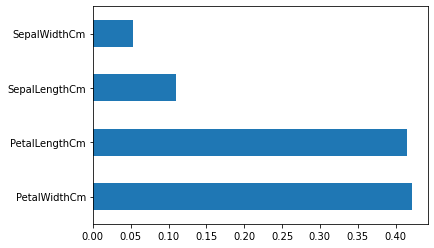

In [23]:
print(model.feature_importances_)
feat_importance = pd.Series(model.feature_importances_, index=A.columns)
feat_importance.nlargest(10).plot(kind='barh')
plt.show()

### Matriks Korelasi dengan Heatmap
---
* Korelasi menyatakan bagaimana fitur terkait satu sama lain atau variabel target.
* Korelasi bisa positif (kenaikan satu nilai fitur meningkatkan nilai variabel target) atau negatif (kenaikan satu nilai fitur menurunkan nilai variabel target)
* Heatmap memudahkan untuk mengidentifikasi fitur mana yang paling terkait dengan variabel target, kami akan memplot peta panas fitur yang berkorelasi menggunakan seaborn library

In [24]:
import pandas as pd
import numpy as np
import seaborn as sns

data = pd.read_csv('Iris.csv')
df3= data.iloc[:,1:]
df3

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


# Latihan(10)

* Buat variabel independent columns dan target kedalam variabel K dan j
* hitung korelasi setiap fitur 
* visualisasikan hasil dari Matriks Korelasi dengan Heatmap

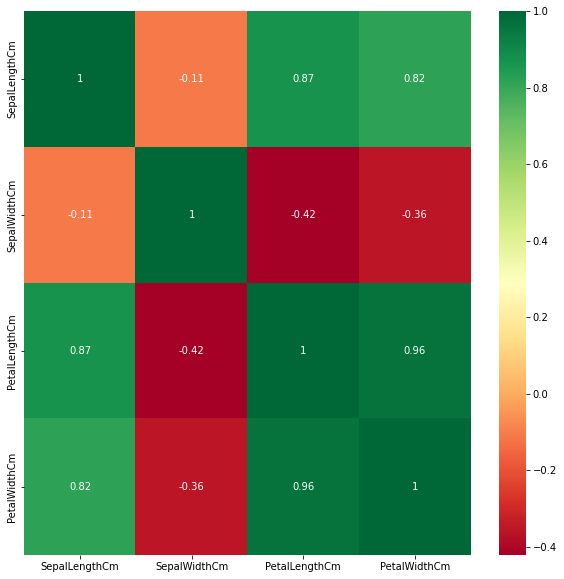

In [33]:
#independent columns --> SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm
K = df3.iloc[:,:4]
# target columns --> species
j = df3.iloc[:,4:]

# mendapatkan korelasi di setiap fitur dalam dataset
corrmat = df3.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))

# plot heatmap
h = sns.heatmap(df3[top_corr_features].corr(),annot=True,cmap="RdYlGn")

Jelaskan apa yg dapat disimpulkan dari hasil visualisasi heatmap diatas

In [ ]:
'''
Korelasi pada heatmap dapat dilihat dari perbandingan warna serta nilai, 
pada heatmap diatas semakin hijau warnanya maka semakin berkorelasi satu sama lain
dan semakin merah warnanya maka semakin tidak berkorelasi (berkorelasi negatif)
sedangkan semakin pudar (mendekati putih) maka korelasi antara dua attribut semakin rendah 
- Attribut PetalWidthCm dan SepalLengthCm memiliki korelasi positif yang tinggi dengan besar 0.82 
- Attribut PetalWidthCm dan SepalWidthCm memiliki korelasi negatif lumayan rendah yaitu -0.36
- Attribut PetalWidthCm dan PetalLengthCm memiliki korelasi positif yang tinggi yaitu sebesar 0.92
- Attribut PetalLengthCm dan SepalLengthCm memiliki korelasi positif yang tinggi yaitu sebesar 0.87
- Attribut PetalLengthCm dan SepalWidthCm memiliki korelasi negatif yang sedang yaitu hanya sebesar -0.42
- Attribut SepalWidthCm dan SepalLengthCm memiliki korelasi negatif yang rendah yaitu hanya sebesar -0.11